<a href="https://colab.research.google.com/github/dlrkdms125/study/blob/main/eyesbody.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install mediapipe opencv-python opencv-python-headless numpy matplotlib

In [6]:
!pip install mediapipe opencv-python opencv-python-headless numpy matplotlib gdown

In [13]:
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import gdown


In [14]:
# Google Drive 파일 다운로드 함수
def download_from_drive(drive_url, output_path):
    # Google Drive 파일 ID 추출
    file_id = drive_url.split('/d/')[1].split('/')[0]
    download_url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(download_url, output_path, quiet=False)

In [18]:
# OpenCV로 윤곽선 검출
def detect_contours(image_path):
    # 이미지 로드 및 전처리
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # 윤곽선 검출
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 윤곽선 그리기
    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

    return contour_image

In [19]:
# MediaPipe Pose로 주요 신체 부위 감지
def detect_pose(image_path):
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True)

    # 이미지 로드 및 RGB 변환
    image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 포즈 추정 수행
    results = pose.process(rgb_image)

    # 랜드마크 그리기
    annotated_image = image.copy()
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            cv2.circle(annotated_image, (x, y), 5, (0, 0, 255), -1)

    return annotated_image

In [20]:
# Google Drive 이미지 경로 (사용자 입력)
drive_url = "https://drive.google.com/file/d/1g2qRSEoKcGWVG5DgvjOU51twwGKwt9d0/view?usp=drive_link"
output_path = "downloaded_image.jpg"

In [22]:
# Google Drive에서 이미지 다운로드
download_from_drive(drive_url, output_path)

Downloading...
From: https://drive.google.com/uc?id=1g2qRSEoKcGWVG5DgvjOU51twwGKwt9d0
To: /content/downloaded_image.jpg
100%|██████████| 123k/123k [00:00<00:00, 55.2MB/s]


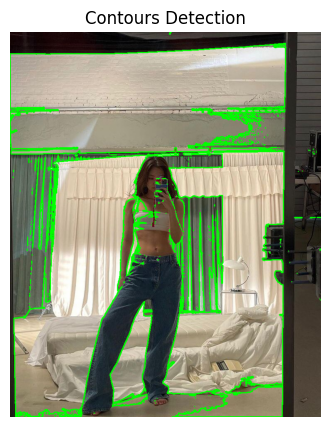

In [23]:
# 윤곽선 검출 결과 표시
contour_result = detect_contours(output_path)
plt.figure(figsize=(10, 5))
plt.title("Contours Detection")
plt.imshow(cv2.cvtColor(contour_result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


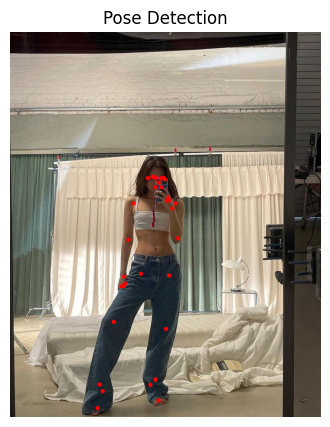

In [24]:
# MediaPipe Pose 결과 표시
pose_result = detect_pose(output_path)
plt.figure(figsize=(10, 5))
plt.title("Pose Detection")
plt.imshow(cv2.cvtColor(pose_result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()